In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from tensorflow.examples.tutorials.mnist import input_data

In [3]:
mnist = input_data.read_data_sets("../03-Convolutional-Neural-Networks/MNIST_data/", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ../03-Convolutional-Neural-Networks/MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ../03-Convolutional-Neural-Networks/MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting ../03-Convolutional-Neural-Networks/MNIST_data/t10k-images-idx3-ubyte.gz
Extracting ../03-Convolutional-Neural-Networks/MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [4]:
tf.reset_default_graph()

In [5]:
# 784 = 28 x28
# 392
# 196
# 392
#784

In [6]:
num_inputs = 784
num_hid1 = 392
num_hid2 = 196
num_hid3 = num_hid1
num_outputs = num_inputs

In [7]:
learning_rate = 0.01

In [8]:
act_func = tf.nn.relu

In [9]:
X = tf.placeholder(tf.float32, [None, num_inputs])

In [10]:
initializer = tf.variance_scaling_initializer()

In [11]:
w1 = tf.Variable(initializer([num_inputs,num_hid1]),tf.float32)
w2 = tf.Variable(initializer([num_hid1, num_hid2]),tf.float32)
w3 = tf.Variable(initializer([num_hid2,num_hid3]),tf.float32)
w4 = tf.Variable(initializer([num_hid3,num_outputs]),tf.float32)

In [12]:
b1 = tf.Variable(tf.zeros(num_hid1))
b2 = tf.Variable(tf.zeros(num_hid2))
b3 = tf.Variable(tf.zeros(num_hid3))
b4 = tf.Variable(tf.zeros(num_outputs))

In [14]:
hid_layer1 = act_func(tf.matmul(X,w1)+b1)
hid_layer2 = act_func(tf.matmul(hid_layer1,w2)+b2)
hid_layer3 = act_func(tf.matmul(hid_layer2,w3)+b3)
output_layer = act_func(tf.matmul(hid_layer3,w4)+b4)


In [15]:
loss = tf.reduce_mean(tf.square(output_layer-X))

In [16]:
optimizer = tf.train.AdamOptimizer(learning_rate)

In [17]:
train = optimizer.minimize(loss)

In [18]:
init = tf.global_variables_initializer()

In [19]:
saver = tf.train.Saver()

In [21]:
num_epoch = 5
batch_size = 150

with tf.Session() as sess:
    sess.run(init)
    for epoch in range(num_epoch):
        num_batches = mnist.train.num_examples // batch_size
        
        for iter in range(num_batches):
            X_batch, y_batch = mnist.train.next_batch(batch_size)
            sess.run(train,feed_dict={X:X_batch})
        training_loss = loss.eval(feed_dict={X:X_batch})
        print("EPOCH {}, LOSS:{}".format(epoch,training_loss))
    saver.save(sess,'./example_stacked_autoencoder_andres.ckpt')

EPOCH 0, LOSS:0.02801424264907837
EPOCH 1, LOSS:0.025870658457279205
EPOCH 2, LOSS:0.02636646293103695
EPOCH 3, LOSS:0.025056637823581696
EPOCH 4, LOSS:0.024186480790376663


In [22]:
num_test_images = 10

with tf.Session() as sess:
    saver.restore(sess,'./example_stacked_autoencoder_andres.ckpt')
    result = output_layer.eval(feed_dict={X:mnist.test.images[:num_test_images]})

INFO:tensorflow:Restoring parameters from ./example_stacked_autoencoder_andres.ckpt


In [24]:
result

array([[-0., -0., -0., ..., -0., -0., -0.],
       [-0., -0., -0., ..., -0., -0., -0.],
       [-0., -0., -0., ..., -0., -0., -0.],
       ...,
       [-0., -0., -0., ..., -0., -0., -0.],
       [-0., -0., -0., ..., -0., -0., -0.],
       [-0., -0., -0., ..., -0., -0., -0.]], dtype=float32)

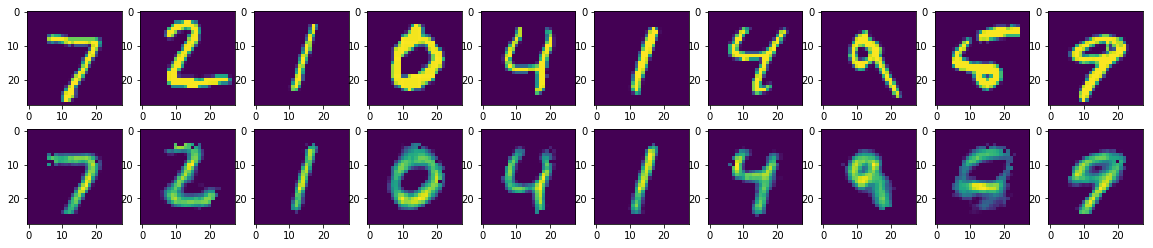

In [27]:
f, a = plt.subplots(2, 10, figsize = (20,4))
for i in range(num_test_images):
    a[0][i].imshow(np.reshape(mnist.test.images[i],(28,28)))
    a[1][i].imshow(np.reshape(result[i],(28,28)))

In [28]:
with tf.Session() as sess:
    saver.restore(sess,'./example_stacked_autoencoder_andres.ckpt')
    result_hid2 = hid_layer2.eval(feed_dict={X:mnist.test.images[:num_test_images]})

INFO:tensorflow:Restoring parameters from ./example_stacked_autoencoder_andres.ckpt


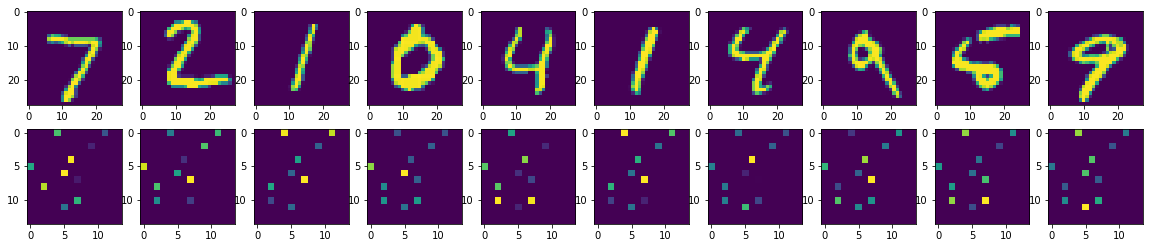

In [37]:
f, a = plt.subplots(2, 10, figsize = (20,4))
for i in range(num_test_images):
    a[0][i].imshow(np.reshape(mnist.test.images[i],(28,28)))
    a[1][i].imshow(np.reshape(result_hid2[i],(14,14)))